## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 4

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, AveragePooling2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2024-08-23 13:45:23.135835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 13:45:23.135946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 13:45:23.272838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
base_dir = '/Face Mask Dataset'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

train_cats_dir = os.path.join(train_dir, 'WithMask')
train_dogs_dir = os.path.join(train_dir, 'WithoutMask')

validation_cats_dir = os.path.join(validation_dir, 'WithMask')
validation_dogs_dir = os.path.join(validation_dir, 'WithoutMask')

test_cats_dir = os.path.join(test_dir, 'WithMask')
test_dogs_dir = os.path.join(test_dir, 'WithoutMask')

In [4]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=100,
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=100,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=100,
        class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


### LeNet5

In [5]:
lenet5 = tf.keras.models.Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(kernel_size=5, strides=1, padding='valid', filters=6, activation='tanh'),
    AveragePooling2D(pool_size=2, strides=2, padding='valid'),
    Conv2D(kernel_size=5, strides=1, padding='valid', filters=16, activation='tanh'),
    AveragePooling2D(pool_size=2, strides=2, padding='valid'),
    Conv2D(kernel_size=5, strides=1, padding='valid', filters=120, activation='tanh'),
    Flatten(),
    Dense(84, activation='tanh'),
    Dense(2, activation='softmax')
])
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 30, 30, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 13, 13, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9720)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       816,564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 867,726 (3.31 MB)

 Trainable params: 867,726 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
lenet5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['Accuracy'])
h = lenet5.fit(train_generator, epochs=7, validation_data=validation_generator)

Epoch 1/7


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/100 ━━━━━━━━━━━━━━━━━━━━ 14:38 9s/step - Accuracy: 0.4200 - loss: 0.7094

I0000 00:00:1724420779.793288     126 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 413ms/step - Accuracy: 0.7943 - loss: 0.6559 - val_Accuracy: 0.9062 - val_loss: 0.2111
Epoch 2/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - Accuracy: 0.9419 - loss: 0.1610 - val_Accuracy: 0.9712 - val_loss: 0.1058
Epoch 3/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 196ms/step - Accuracy: 0.9666 - loss: 0.0925 - val_Accuracy: 0.9887 - val_loss: 0.0459
Epoch 4/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - Accuracy: 0.9734 - loss: 0.0795 - val_Accuracy: 0.9800 - val_loss: 0.0575
Epoch 5/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - Accuracy: 0.9789 - loss: 0.0606 - val_Accuracy: 0.9800 - val_loss: 0.0512
Epoch 6/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - Accuracy: 0.9822 - loss: 0.0510 - val_Accuracy: 0.9900 - val_loss: 0.0353
Epoch 7/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - Accuracy: 0.9842 - loss: 0.0444 - val_Accuracy: 0.9900 - val_loss: 0.0275


In [7]:
lenet5.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step - Accuracy: 0.9650 - loss: 0.0850


[0.09386745095252991, 0.9657257795333862]

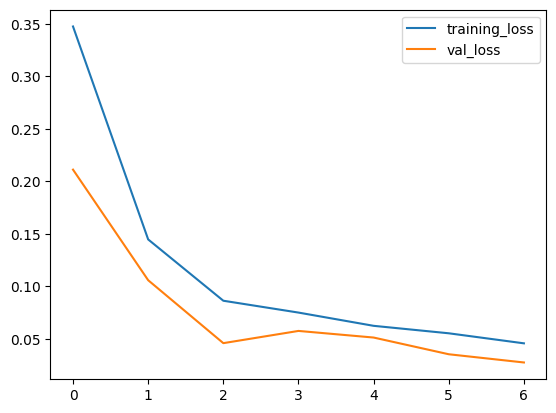

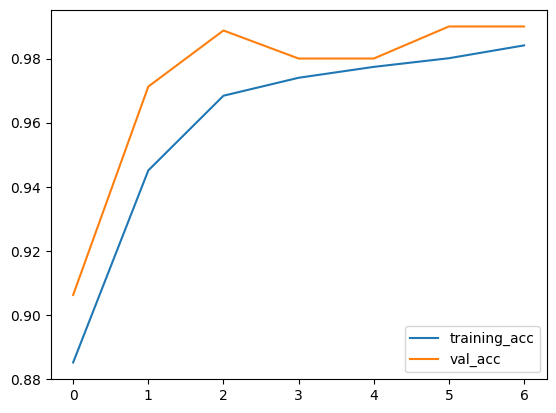

In [8]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['Accuracy'], label='training_acc')
plt.plot(h.history['val_Accuracy'], label='val_acc')
plt.legend()
plt.show()

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227, 227),
        batch_size=100,
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=100,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(227, 227),
        batch_size=100,
        class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


### AlexNet

In [10]:
alexnet = tf.keras.models.Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(kernel_size=11, strides=4, filters=96, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2, padding='valid'),
    Conv2D(kernel_size=5, strides=1, filters=256, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2, padding='valid'),
    Conv2D(kernel_size=3, strides=1, filters=384, padding='same', activation='relu'),
    Conv2D(kernel_size=3, strides=1, filters=384, padding='same', activation='relu'),
    Conv2D(kernel_size=3, strides=1, filters=256, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2, padding='valid'),
    Flatten(),
    Dense(9216, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
])
alexnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9216)           │    84,943,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,233,410 (546.39 MB)

 Trainable params: 143,233,410 (546.39 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
alexnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['Accuracy'])
h = alexnet.fit(train_generator, epochs=7, validation_data=validation_generator)

Epoch 1/7


2024-08-23 13:49:26.933749: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,96,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,96,27,27]{3,2,1,0}, f32[100,256,27,27]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-23 13:49:27.639806: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.706199622s
Trying algorithm eng0{} for conv (f32[256,96,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,96,27,27]{3,2,1,0}, f32[100,256,27,27]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-23 13:49:29.211811: E external/

  2/100 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - Accuracy: 0.5400 - loss: 1.7140  

W0000 00:00:1724420973.982983     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - Accuracy: 0.5058 - loss: 1.2366

W0000 00:00:1724421004.879903     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 330ms/step - Accuracy: 0.5058 - loss: 1.2327 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 326ms/step - Accuracy: 0.5045 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 323ms/step - Accuracy: 0.4969 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 327ms/step - Accuracy: 0.5023 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 326ms/step - Accuracy: 0.5027 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 325ms/step - Accuracy: 0.4948 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - Accuracy: 0.4974 - loss: 0.6932 - val_Accuracy: 0.5000 - val_loss: 0.6932


In [12]:
alexnet.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 819ms/step - Accuracy: 0.5337 - loss: 0.6929


W0000 00:00:1724421224.122571     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.69305819272995, 0.5131048560142517]

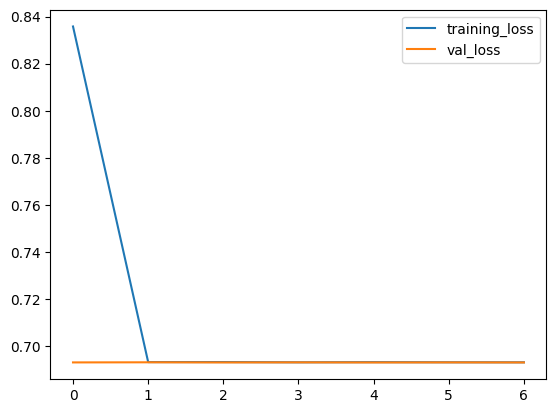

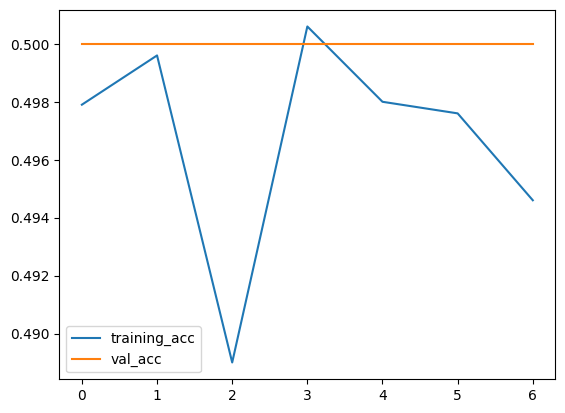

In [13]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['Accuracy'], label='training_acc')
plt.plot(h.history['val_Accuracy'], label='val_acc')
plt.legend()
plt.show()

In [14]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


### VGG16

In [15]:
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)

vggmodel = Model(inputs=base_model.input, outputs=x)
vggmodel.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
vggmodel.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
h = vggmodel.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5


2024-08-23 13:53:51.653588: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[100,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-23 13:53:53.026710: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63575, expected 3.88662
2024-08-23 13:53:53.026785: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.83747, expected 5.08834
2024-08-23 13:53:53.026796: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.21971, expected 5.47058
2024-08-23 13:53:53.026805: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137]

100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 352ms/step - acc: 0.8741 - loss: 0.3945 - val_acc: 0.9912 - val_loss: 0.1028
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 345ms/step - acc: 0.9861 - loss: 0.0939 - val_acc: 0.9962 - val_loss: 0.0584
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 340ms/step - acc: 0.9919 - loss: 0.0596 - val_acc: 0.9962 - val_loss: 0.0424
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 350ms/step - acc: 0.9948 - loss: 0.0417 - val_acc: 0.9962 - val_loss: 0.0335
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 341ms/step - acc: 0.9960 - loss: 0.0313 - val_acc: 0.9962 - val_loss: 0.0280


In [17]:
vggmodel.evaluate(test_generator)

 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - acc: 0.9907 - loss: 0.0399

2024-08-23 13:57:44.148832: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[92,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[92,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-08-23 13:57:45.323878: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50176: 3.93093, expected 3.09758
2024-08-23 13:57:45.323932: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50177: 5.14004, expected 4.30669
2024-08-23 13:57:45.323943: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50178: 5.33501, expected 4.50166
2024-08-23 13:57:45.323951: E external/local_xla/xla/service/gpu/buffer_comparato

10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - acc: 0.9911 - loss: 0.0387


[0.03321140259504318, 0.992943525314331]

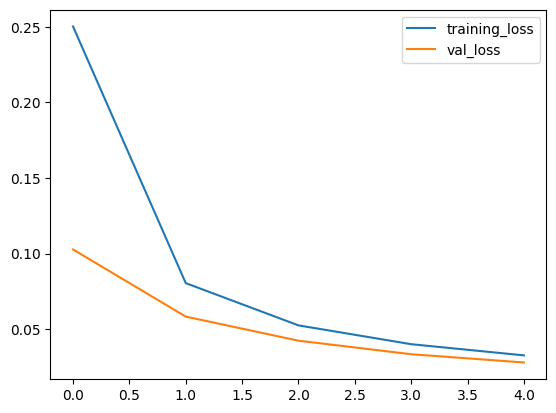

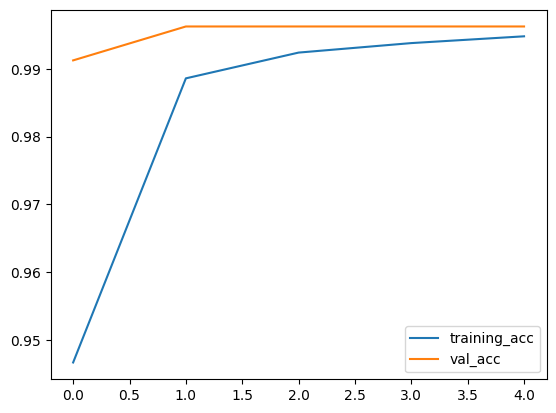

In [18]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_acc')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

### InceptionV3

In [19]:
base_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
inceptionv3model = Model(inputs=base_model.input, outputs=x)
inceptionv3model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [20]:
inceptionv3model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['Accuracy'])
h = inceptionv3model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 391ms/step - Accuracy: 0.9669 - loss: 0.1935 - val_Accuracy: 0.9975 - val_loss: 0.0121
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 325ms/step - Accuracy: 0.9985 - loss: 0.0099 - val_Accuracy: 0.9975 - val_loss: 0.0059
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 322ms/step - Accuracy: 0.9997 - loss: 0.0033 - val_Accuracy: 0.9987 - val_loss: 0.0122
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - Accuracy: 0.9997 - loss: 0.0012 - val_Accuracy: 0.9975 - val_loss: 0.0147
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 324ms/step - Accuracy: 1.0000 - loss: 3.5459e-04 - val_Accuracy: 0.9987 - val_loss: 0.0063


In [21]:
inceptionv3model.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - Accuracy: 0.9978 - loss: 0.0084 


[0.012163212522864342, 0.9969757795333862]

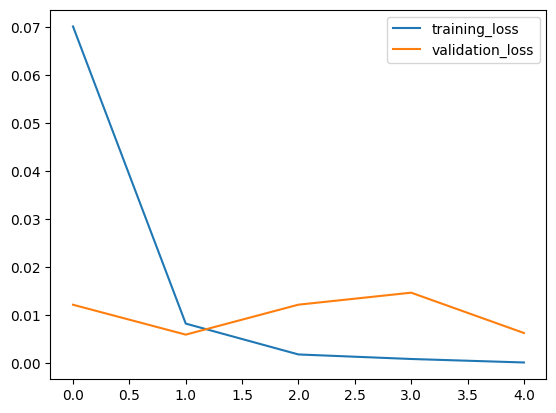

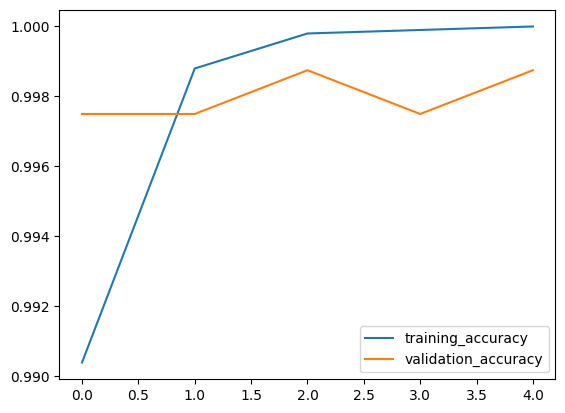

In [22]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['Accuracy'], label='training_accuracy')
plt.plot(h.history['val_Accuracy'], label='validation_accuracy')
plt.legend()
plt.show()

### ResNet50

In [23]:
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='sigmoid')(x)
resnetmodel = Model(inputs=base_model.input, outputs=x)
resnetmodel.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [24]:
resnetmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['acc'])
h = resnetmodel.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 366ms/step - acc: 0.6245 - loss: 1.1219 - val_acc: 0.8363 - val_loss: 0.3854
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 324ms/step - acc: 0.8695 - loss: 0.3661 - val_acc: 0.9287 - val_loss: 0.2801
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 329ms/step - acc: 0.9150 - loss: 0.2695 - val_acc: 0.9050 - val_loss: 0.2385
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 325ms/step - acc: 0.9401 - loss: 0.2172 - val_acc: 0.9050 - val_loss: 0.2176
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 326ms/step - acc: 0.9491 - loss: 0.1872 - val_acc: 0.9463 - val_loss: 0.1892


In [25]:
resnetmodel.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - acc: 0.9639 - loss: 0.1803


[0.17549309134483337, 0.961693525314331]

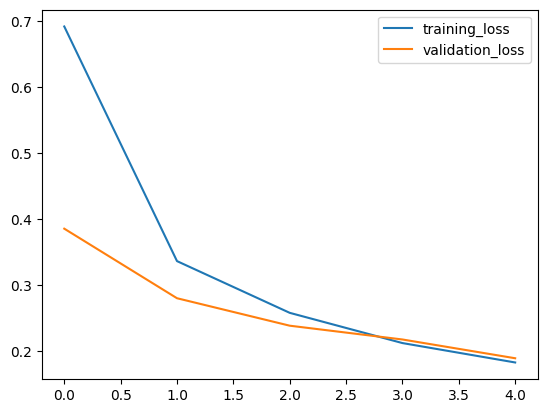

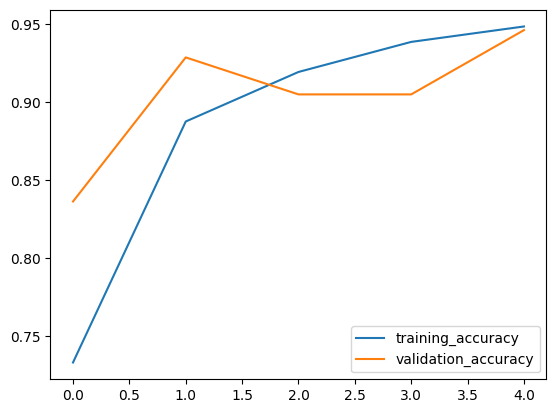

In [26]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

### EfficientNetB0

In [27]:
base_model = EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='sigmoid')(x)
efficientmodel = Model(inputs=base_model.input, outputs=x)
efficientmodel.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,175,013 (15.93 MB)

 Trainable params: 125,442 (490.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [28]:
efficientmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['acc'])
h = efficientmodel.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 384ms/step - acc: 0.5002 - loss: 1.5475 - val_acc: 0.5000 - val_loss: 0.6966
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - acc: 0.5078 - loss: 0.7310 - val_acc: 0.5000 - val_loss: 0.7055
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 318ms/step - acc: 0.4945 - loss: 0.7172 - val_acc: 0.5000 - val_loss: 0.7200
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - acc: 0.4986 - loss: 0.7674 - val_acc: 0.5000 - val_loss: 0.8944
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 320ms/step - acc: 0.4929 - loss: 0.7531 - val_acc: 0.5000 - val_loss: 0.7001


In [29]:
efficientmodel.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - acc: 0.4814 - loss: 0.7046


[0.7032718062400818, 0.4868951737880707]

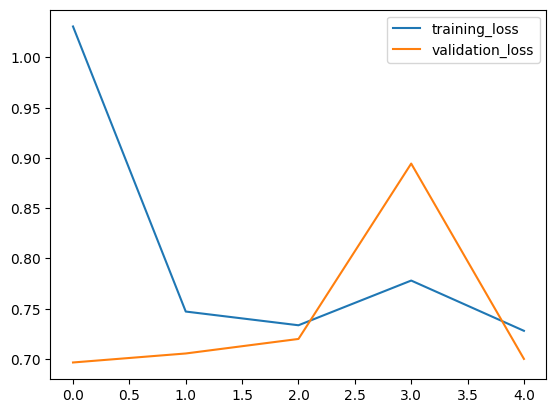

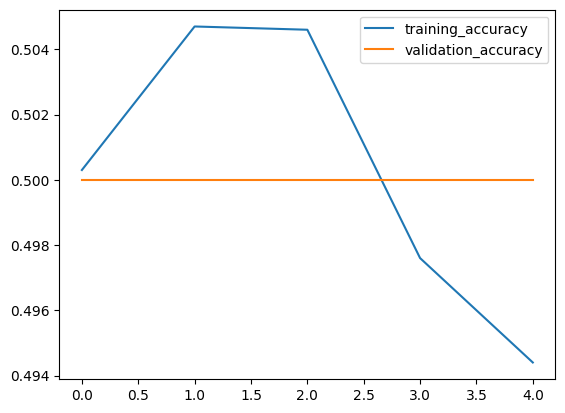

In [30]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

### MobileNetV2

In [31]:
base_model = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(2, activation='sigmoid')(x)
mobilemodel = Model(inputs=base_model.input, outputs=x)
mobilemodel.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,383,426 (9.09 MB)

 Trainable params: 125,442 (490.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [32]:
mobilemodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['acc'])
h = mobilemodel.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 357ms/step - acc: 0.9373 - loss: 0.2712 - val_acc: 0.9962 - val_loss: 0.0297
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 323ms/step - acc: 0.9982 - loss: 0.0069 - val_acc: 0.9987 - val_loss: 0.0095
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 328ms/step - acc: 0.9996 - loss: 0.0027 - val_acc: 0.9975 - val_loss: 0.0125
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 334ms/step - acc: 1.0000 - loss: 0.0013 - val_acc: 0.9987 - val_loss: 0.0052
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 320ms/step - acc: 1.0000 - loss: 2.6892e-05 - val_acc: 0.9987 - val_loss: 0.0056


In [33]:
mobilemodel.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 780ms/step - acc: 0.9990 - loss: 0.0061


[0.016365723684430122, 0.9979838728904724]

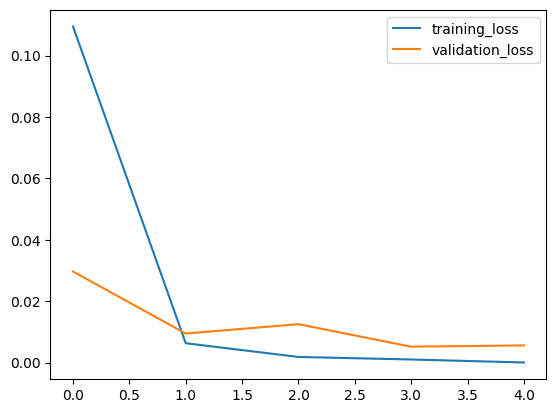

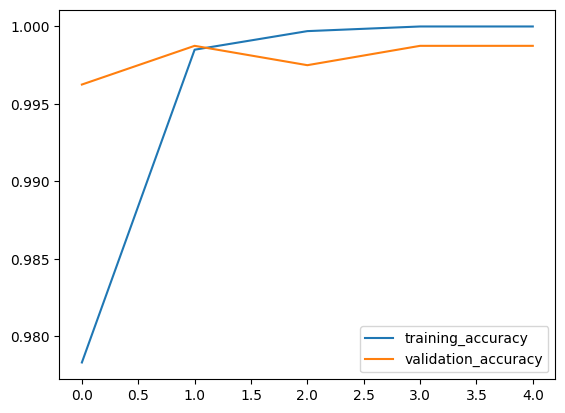

In [34]:
plt.plot(h.history['loss'], label='training_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label='training_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()